<a href="https://colab.research.google.com/github/msalmankhan03/Object-Detection/blob/main/Vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
from google.colab import files
from IPython.display import HTML
from base64 import b64encode
import zipfile
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Replace with your actual Roboflow API key and project info
rf = Roboflow(api_key="UVynpeaBPWtSeiT7QTXx")
project = rf.workspace("salmanworkspace").project("vehicle-detection-rbqpf-ks67d")
dataset = project.version(1).download("yolov8")  # YOLOv8 format
print("Dataset downloaded at:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Vehicle-Detection-1 in yolov8:: 100%|██████████| 8112/8112 [00:01<00:00, 6603.24it/s]

Dataset downloaded at: /content/Vehicle-Detection-1


In [5]:
!ls {dataset.location}


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
# Initialize YOLOv8 model (YOLOv8n is fast; you can use yolov8s/m/l for higher accuracy)
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # pretrained weights

# Train using existing data.yaml
model.train(
    data='/content/Vehicle-Detection-1/data.yaml',  # replace with your actual path
    epochs=15,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Vehicle-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eb4688ae690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [8]:
from google.colab import files
uploaded = files.upload()

model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict(list(uploaded.keys())[0], save=True)


Saving 123.webp to 123.webp

image 1/1 /content/123.webp: 480x640 6 cars, 1 truck-l-, 1 truck-s-, 39.6ms
Speed: 2.2ms preprocess, 39.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict2


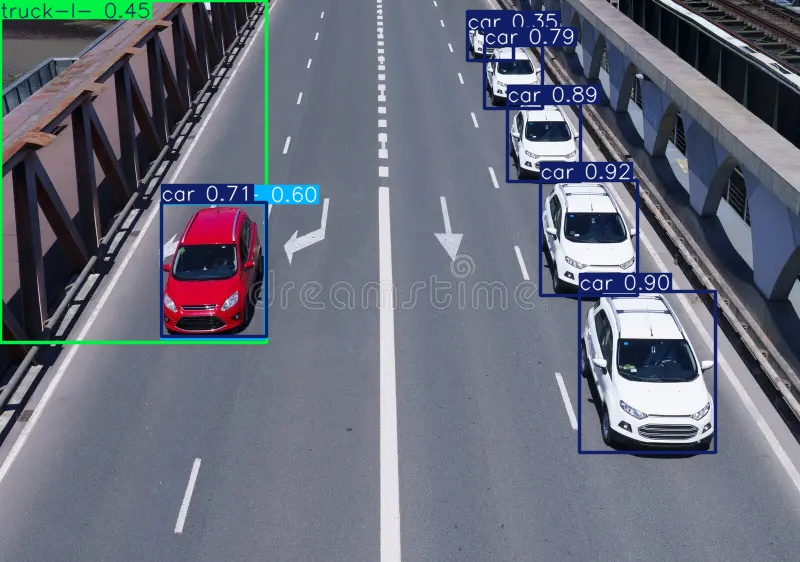

In [9]:

import cv2
from google.colab.patches import cv2_imshow

img_path = "/content/runs/detect/predict2/123.jpg"

img = cv2.imread(img_path)
cv2_imshow(img)


In [10]:
from google.colab import files
uploaded = files.upload()   # upload .mp4 or .avi

video_path = list(uploaded.keys())[0]

model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict(source=video_path, save=True)


Saving traffic.mp4 to traffic.mp4

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/335) /content/traffic.mp4: 384x640 1 big bus, 65.6ms
video 1/1 (frame 2/335) /content/traffic.mp4: 384x640 1 big bus, 10.4ms
video 1/1 (frame 3/335) /content/traffic.mp4: 384x640 1 big bus, 7.4ms
video 1/1 (frame 4/335) /content/traffic.mp4: 384x640 1 big bus, 11.6ms
video 1/1 (frame 5/335) /content/traffic.mp4: 384x640 1 big bus, 8.0ms
video 1/1 (frame 6/335) /content/traffic.mp4: 384x640 1 big bus,